# EVN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [2]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [3]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [4]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [5]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [6]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [7]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [8]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [9]:
# train inputs을 numpy array로 변환
np.array(train_inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([2, 3, 4, 5]), list([2, 3, 6])], dtype=object)

In [10]:
# train labels을 numpy array로 변환
np.array(train_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([1, 1, 1, 2]), list([1, 1, 0])], dtype=object)

In [11]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [12]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [13]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [14]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [15]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 1.2419067e-02, -2.1176172e-02, -1.1654675e-02,  1.4201056e-02,
          1.9207504e-02,  2.7241472e-02, -4.2089045e-02, -4.1037425e-03],
        [ 2.3614798e-02, -8.8751800e-03, -1.4380775e-02, -3.3266641e-02,
         -6.7437291e-03, -7.2995536e-03, -4.7626257e-02,  4.3087490e-03],
        [-3.4339607e-02, -4.6176899e-02, -1.9612337e-02, -2.4367785e-02,
         -2.4910903e-02,  4.7244374e-02, -3.0440450e-02,  3.6931995e-02],
        [-4.8279874e-03, -6.3328743e-03,  1.2054931e-02, -3.1769969e-02,
          4.2891469e-02,  2.4716679e-02,  4.6049211e-02,  3.5105411e-02]],

       [[ 1.2419067e-02, -2.1176172e-02, -1.1654675e-02,  1.4201056e-02,
          1.9207504e-02,  2.7241472e-02, -4.2089045e-02, -4.1037425e-03],
        [ 2.3614798e-02, -8.8751800e-03, -1.4380775e-02, -3.3266641e-02,
         -6.7437291e-03, -7.2995536e-03, -4.7626257e-02,  4.3087490e-03],
        [ 2.1482114e-02,  3.3576641e-02,  3.6519479e-02, -9.76324

In [16]:
# embedding weight
weight = embedding.get_weights()[0]
weight

array([[-4.9970984e-02,  4.3600146e-02, -1.9727755e-02,  4.9215700e-02,
         2.1528278e-02, -1.2473844e-02, -2.2835279e-02,  4.5005348e-02],
       [ 3.1732928e-02, -4.0571917e-02,  2.1162543e-02,  2.1940861e-02,
        -1.9999659e-02,  3.8787428e-02,  2.5376763e-02, -3.2941252e-04],
       [ 1.2419067e-02, -2.1176172e-02, -1.1654675e-02,  1.4201056e-02,
         1.9207504e-02,  2.7241472e-02, -4.2089045e-02, -4.1037425e-03],
       [ 2.3614798e-02, -8.8751800e-03, -1.4380775e-02, -3.3266641e-02,
        -6.7437291e-03, -7.2995536e-03, -4.7626257e-02,  4.3087490e-03],
       [-3.4339607e-02, -4.6176899e-02, -1.9612337e-02, -2.4367785e-02,
        -2.4910903e-02,  4.7244374e-02, -3.0440450e-02,  3.6931995e-02],
       [-4.8279874e-03, -6.3328743e-03,  1.2054931e-02, -3.1769969e-02,
         4.2891469e-02,  2.4716679e-02,  4.6049211e-02,  3.5105411e-02],
       [ 2.1482114e-02,  3.3576641e-02,  3.6519479e-02, -9.7632408e-05,
        -4.3012787e-02,  4.9498860e-02, -4.4924747e-02,  5

In [17]:
# numpy를 이용해서 직접 조회 (두 결과값 비교)
weight[train_inputs], hidden

(array([[[ 1.2419067e-02, -2.1176172e-02, -1.1654675e-02,  1.4201056e-02,
           1.9207504e-02,  2.7241472e-02, -4.2089045e-02, -4.1037425e-03],
         [ 2.3614798e-02, -8.8751800e-03, -1.4380775e-02, -3.3266641e-02,
          -6.7437291e-03, -7.2995536e-03, -4.7626257e-02,  4.3087490e-03],
         [-3.4339607e-02, -4.6176899e-02, -1.9612337e-02, -2.4367785e-02,
          -2.4910903e-02,  4.7244374e-02, -3.0440450e-02,  3.6931995e-02],
         [-4.8279874e-03, -6.3328743e-03,  1.2054931e-02, -3.1769969e-02,
           4.2891469e-02,  2.4716679e-02,  4.6049211e-02,  3.5105411e-02]],
 
        [[ 1.2419067e-02, -2.1176172e-02, -1.1654675e-02,  1.4201056e-02,
           1.9207504e-02,  2.7241472e-02, -4.2089045e-02, -4.1037425e-03],
         [ 2.3614798e-02, -8.8751800e-03, -1.4380775e-02, -3.3266641e-02,
          -6.7437291e-03, -7.2995536e-03, -4.7626257e-02,  4.3087490e-03],
         [ 2.1482114e-02,  3.3576641e-02,  3.6519479e-02, -9.7632408e-05,
          -4.3012787e-02,  4.

In [18]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.3248762 , 0.32992664, 0.34519714],
        [0.3419285 , 0.31954032, 0.33853114],
        [0.30403996, 0.3378204 , 0.3581396 ],
        [0.3369824 , 0.34342462, 0.319593  ]],

       [[0.3248762 , 0.32992664, 0.34519714],
        [0.3419285 , 0.31954032, 0.33853114],
        [0.33021182, 0.33296874, 0.33681947],
        [0.31851667, 0.35371208, 0.3277713 ]]], dtype=float32)>

In [19]:
# dense의 wieght, bias
weight, bias = linear.get_weights()
weight, bias

(array([[ 0.49012047, -0.55169976, -0.2750466 ],
        [ 0.7041672 ,  0.22075099, -0.29814506],
        [ 0.59796804,  0.5253106 , -0.54769313],
        [-0.6734092 ,  0.44881624,  0.1462624 ],
        [ 0.72792965,  0.36878902, -0.2458202 ],
        [-0.56683064,  0.24440116,  0.61582977],
        [ 0.16142148,  0.40285295, -0.08918887],
        [-0.5434125 ,  0.35701865, -0.51770926]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [20]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.03138061, -0.01595436,  0.02929095],
        [ 0.00832663, -0.05939157, -0.00165897],
        [-0.11456085, -0.00920557,  0.04920287],
        [ 0.02734537,  0.04628235, -0.02563692]],

       [[-0.03138061, -0.01595436,  0.02929095],
        [ 0.00832663, -0.05939157, -0.00165897],
        [-0.01352091, -0.00520664,  0.00629188],
        [-0.04412983,  0.06067862, -0.01548854]]], dtype=float32)

In [21]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[0.96910655, 0.9841722 , 1.0297241 ],
         [1.0083615 , 0.94233763, 0.9983424 ],
         [0.8917576 , 0.9908367 , 1.0504334 ],
         [1.0277227 , 1.0473701 , 0.97468895]],
 
        [[0.96910655, 0.9841722 , 1.0297241 ],
         [1.0083615 , 0.94233763, 0.9983424 ],
         [0.98657006, 0.99480695, 1.0063117 ],
         [0.9568297 , 1.0625573 , 0.9846308 ]]], dtype=float32),
 array([[[2.983003 ],
         [2.9490414],
         [2.9330277],
         [3.0497818]],
 
        [[2.983003 ],
         [2.9490414],
         [2.9876885],
         [3.0040178]]], dtype=float32))

In [22]:
# 두 결과값 비교
probs = numerator / denominator
probs, outputs

(array([[[0.32487616, 0.32992667, 0.34519717],
         [0.34192857, 0.31954032, 0.33853117],
         [0.30403996, 0.3378204 , 0.3581396 ],
         [0.33698237, 0.3434246 , 0.319593  ]],
 
        [[0.32487616, 0.32992667, 0.34519717],
         [0.34192857, 0.31954032, 0.33853117],
         [0.33021182, 0.33296877, 0.33681947],
         [0.31851667, 0.35371205, 0.3277713 ]]], dtype=float32),
 <tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
 array([[[0.3248762 , 0.32992664, 0.34519714],
         [0.3419285 , 0.31954032, 0.33853114],
         [0.30403996, 0.3378204 , 0.3581396 ],
         [0.3369824 , 0.34342462, 0.319593  ]],
 
        [[0.3248762 , 0.32992664, 0.34519714],
         [0.3419285 , 0.31954032, 0.33853114],
         [0.33021182, 0.33296874, 0.33681947],
         [0.31851667, 0.35371208, 0.3277713 ]]], dtype=float32)>)

In [53]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # RNN
    rnn = tf.keras.layers.SimpleRNN(units=64, return_sequences=True) 
    # Bidirectional
    bi_rnn = tf.keras.layers.Bidirectional(rnn) # 양방향, 128
    hidden = bi_rnn(hidden)
    # CNN
    cnn = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="causal") # 64
    hidden = cnn(hidden)
    #######################################
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

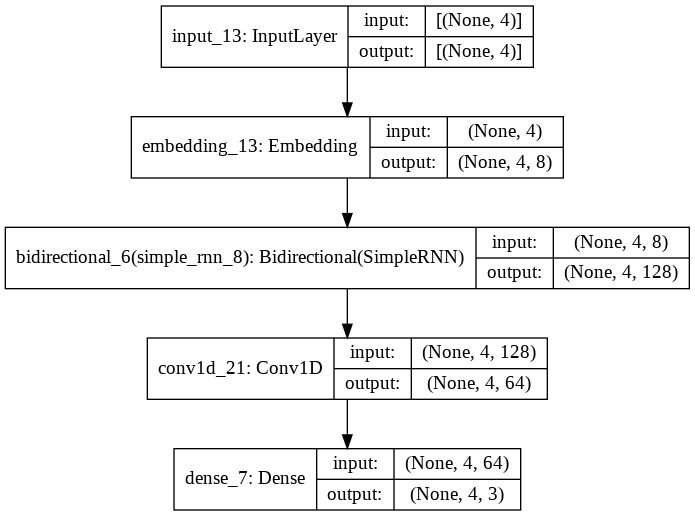

In [54]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [55]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0947 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0620 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.0293 - accuracy: 0.8750
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9956 - accuracy: 0.8750
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.9600 - accuracy: 0.8750
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9217 - accuracy: 0.8750
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8806 - accuracy: 0.8750
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8363 - accuracy: 0.8750
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7891 - accuracy: 0.8750
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7391 - accuracy: 0.8750
Epoch 11/100
1/1 [===========

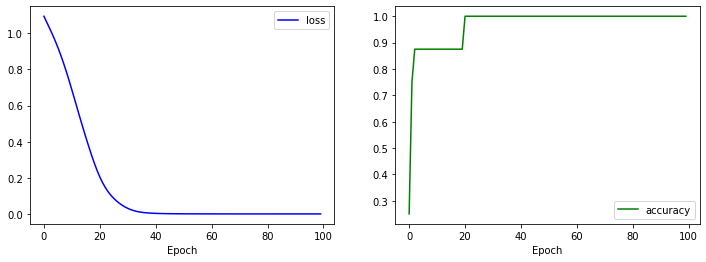

In [57]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [58]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 354ms/step - loss: 1.5465e-04 - accuracy: 1.0000


[0.00015465461183339357, 1.0]

## 예측

In [59]:
# 추론할 입력
string = '나는 기분이 우울해'

In [60]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [61]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [62]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [63]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[8.59860957e-05, 9.99860168e-01, 5.38804125e-05],
        [5.58363499e-05, 9.99915719e-01, 2.85403221e-05],
        [9.99866843e-01, 1.07483858e-04, 2.55774667e-05],
        [1.00301215e-04, 9.99692798e-01, 2.06899087e-04]]], dtype=float32)

In [64]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])

In [65]:
# 각 예측 값에 대한 label string
for row in y_pred_class:
    for val in row:
        print(val, ':', id_to_label[val])

1 : 중립
1 : 중립
0 : 부정
1 : 중립


# 문장 긍정(1), 부정(0) 분류 프로젝트

## 데이터

In [66]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [1, 0]  # 긍정(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '긍정'}

## Vocabulary

In [67]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [68]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [69]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [70]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [71]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [72]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[1, 0]

In [73]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [74]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [75]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([1, 0])

## 모델링

In [76]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 0.02951249,  0.04050869, -0.00110207, -0.00286565,
         -0.0134358 ,  0.01925356, -0.03192197, -0.0224604 ],
        [-0.0074688 , -0.00308798, -0.0495938 ,  0.04538815,
         -0.0085479 , -0.00170746,  0.00109444, -0.00764736],
        [-0.02905436, -0.02890896, -0.02936269,  0.0205111 ,
         -0.00663141, -0.04887185,  0.03184196,  0.01743067],
        [ 0.0218735 ,  0.02232413,  0.00967147, -0.02633269,
         -0.03542371,  0.02308096, -0.04393815, -0.0128117 ]],

       [[ 0.02951249,  0.04050869, -0.00110207, -0.00286565,
         -0.0134358 ,  0.01925356, -0.03192197, -0.0224604 ],
        [-0.0074688 , -0.00308798, -0.0495938 ,  0.04538815,
         -0.0085479 , -0.00170746,  0.00109444, -0.00764736],
        [ 0.02587981, -0.02921733, -0.04669337, -0.04177745,
         -0.04581201, -0.00211779,  0.0447146 ,  0.03462278],
        [ 0.00830946,  0.01685952,  0.0452924 , -0.01516217,
          0.02946118,  0.

In [77]:
# 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
pool = tf.keras.layers.GlobalMaxPool1D()
hidden_pool = pool(hidden)
hidden_pool

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[ 0.02951249,  0.04050869,  0.00967147,  0.04538815, -0.00663141,
         0.02308096,  0.03184196,  0.01743067],
       [ 0.02951249,  0.04050869,  0.0452924 ,  0.04538815,  0.02946118,
         0.04157338,  0.0447146 ,  0.03462278]], dtype=float32)>

In [78]:
# 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
outputs = linear(hidden_pool)
outputs

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.4858245 , 0.5141755 ],
       [0.49470106, 0.5052989 ]], dtype=float32)>

In [145]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # bidirectional rnn
    rnn_bi = tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=128, return_sequences=True)) # 256
    hidden = rnn_bi(hidden)

    # cnn layer1
    cnn_1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="causal") # 128
    hidden = cnn_1(hidden)

    # cnn layer2
    cnn_2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="valid") # 64
    hidden = cnn_2(hidden)

    #######################################
    # 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
    pool = tf.keras.layers.GlobalMaxPool1D()
    hidden_pool = pool(hidden)  # (bs, d_model)
    # 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
    linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    outputs = linear(hidden_pool)  # (bs, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

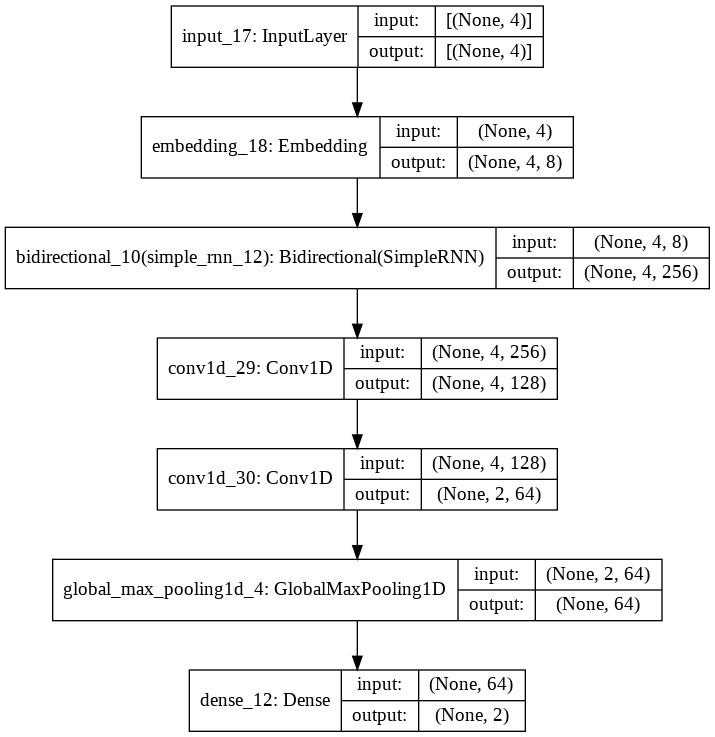

In [146]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [147]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [148]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6799 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6159 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 10ms/step - loss: 0.5522 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 8ms/step - loss: 0.4748 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 12ms/step - loss: 0.3905 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 0.3020 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2126 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 0.1329 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 8ms/step - loss: 0.0736 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 1.0000
Epoch 11/20
1/1 [===================

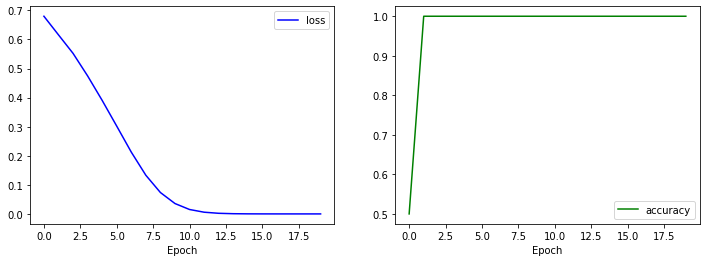

In [149]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [150]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 284ms/step - loss: 2.9802e-07 - accuracy: 1.0000


[2.9802316703353426e-07, 1.0]

## 예측

In [151]:
# 추론할 입력
string = '나는 기분이 우울해'

In [152]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [153]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [154]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [155]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[9.9999702e-01, 2.9306007e-06]], dtype=float32)

In [156]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=1)
y_pred_class

array([0])

In [157]:
# 각 예측 값에 대한 label string
for val in y_pred_class:
    print(val, ':', id_to_label[val])

0 : 부정
